# 4.10 IC Profile Family Status

### This script contains the following points: <br> <br> 
1. Importing Libraries <br> <br> 
2. Importing Data Sets <br> <br> 
3. Data Checks <br><br>
4. Profiling Variable: Family Status <br>
 > 04.01 Distribution of Profiles <br>
 > 04.02 Descriptive Statistics for each profiled segment <br>
 > 04.03 Relationship with profiles and regions / departments <br>
 

## 01 Import Libraries

In [1]:
# Import Libraries with visualization capabilities
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


## 02 Import Data

In [2]:
# First create a string of the path for the main project folder
path = r'/Users/mistystone/Library/CloudStorage/OneDrive-Personal/Documents/CF_Data_Ach4_Python/2023-05_Instacart_Basket_Analysis/'

In [3]:
# Import pickle files
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','high_activity_customers.pkl')) 

## 03 Data Checks

In [4]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequent_flag,gender,state,age,date_joined,number_dependents,family_status,income,region,low_activity_flag
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN


In [5]:
df.shape

(30964564, 32)

## 04 Profiling Variable: Family Status

### 04.01 Distribution of Profiles

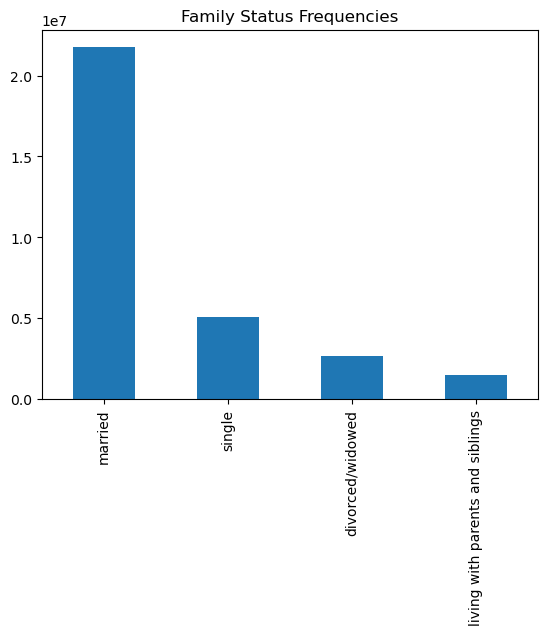

In [19]:
# Bar graph by profiled segment
bar_family_status = df['family_status'].value_counts().plot.bar(title='Family Status Frequencies')

In [20]:
# Export bar chart
bar_family_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_famstat.png'), bbox_inches='tight')

### 04.02 Descriptive Statistics for each profiled segment

In [8]:
# Comparing mean, min, max for each profile group
df.groupby('family_status').agg({'prices': ['mean','min','max']})

prices           
                                      mean  min   max
family_status                                        
divorced/widowed                  7.801014  1.0  25.0
living with parents and siblings  7.800604  1.0  25.0
married                           7.790278  1.0  25.0
single                            7.783597  1.0  25.0

In [9]:
# Comparing the total of prices for each profile group
df.groupby('family_status').agg({'prices': ['sum']})

,prices
,sum
family_status,
divorced/widowed,20632363.5
living with parents and siblings,11552531.1
married,169362211.8
single,39647129.2


In [10]:
df.groupby('family_status').agg({'order_number': ['mean','min','max']})

order_number        
                                         mean min max
family_status                                        
divorced/widowed                    17.993361   1  99
living with parents and siblings    18.000712   1  99
married                             17.778735   1  99
single                              17.939521   1  99

### 04.03 Relationship with profiles and regions / departments

In [11]:
# Check counts
df['region'].value_counts(dropna = False)

South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: region, dtype: int64

In [12]:
# Check counts
df['department_id'].value_counts(dropna = False).sort_index()

1     2121731
2       34411
3     1120828
4     9079273
5      144627
6      255991
7     2571901
8       93060
9      822136
10      33451
11     424306
12     674781
13    1782705
14     670850
15    1012074
16    5177182
17     699857
18     410392
19    2766406
20    1003834
21      64768
Name: department_id, dtype: int64

In [13]:
crosstab_depts = pd.crosstab(df['department_id'], df['family_status'], dropna = False)
crosstab_depts

family_status,divorced/widowed,living with parents and siblings,married,single
department_id,,,,
1,183957,102993,1489390,345391
2,2842,1815,23882,5872
3,95735,53684,785749,185660
4,777094,430539,6373293,1498347
5,11859,8379,99421,24968
6,21814,12394,179136,42647
7,220879,119107,1807453,424462
8,8025,5338,64120,15577
9,70251,39542,578298,134045


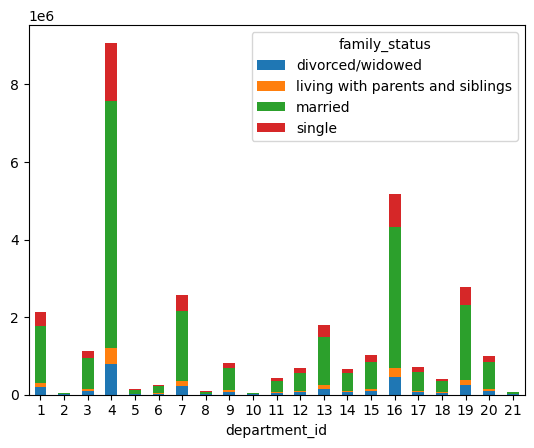

In [14]:
# Create a stacked bar chart of this data.
bar_family_status_depts = crosstab_depts.plot.bar(rot = 0, stacked = True)

In [15]:
# Export bar chart
bar_family_status_depts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_status_depts.png'))

In [16]:
crosstab_regions = pd.crosstab(df['region'], df['family_status'], dropna = False)
crosstab_regions

family_status,divorced/widowed,living with parents and siblings,married,single
region,,,,
Midwest,617198,351435,5087262,1205618
Northeast,478767,256430,3853773,875715
South,877314,505457,7223749,1704619
West,671992,367850,5578927,1308458


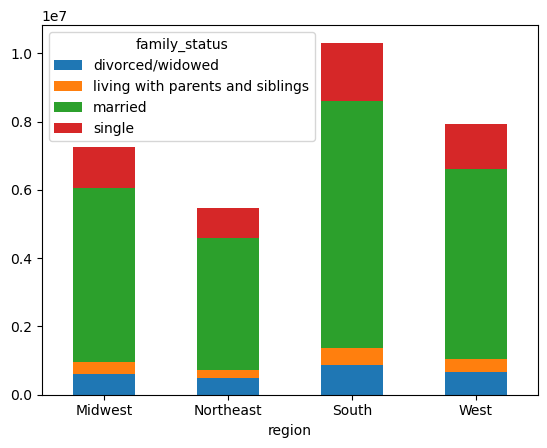

In [17]:
# Create a stacked bar chart of this data.
bar_family_status_regions = crosstab_regions.plot.bar(rot = 0, stacked = True)

In [18]:
# Export bar chart
bar_family_status_regions.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_status_regions.png'))